In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/california-housing-prices/housing.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")
data.shape
data.head()
# data.info()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data["ocean_proximity"].value_counts()
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

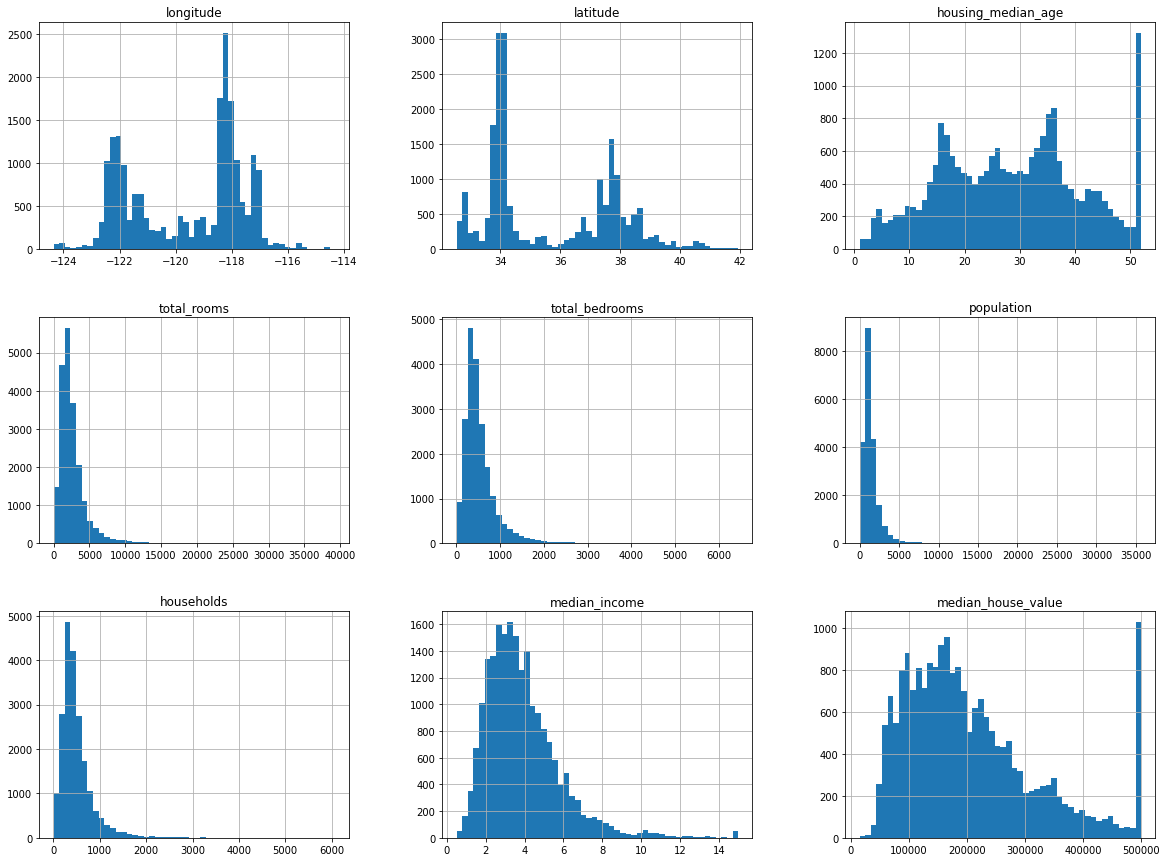

In [5]:
data.hist(bins=50, figsize=(20,15))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

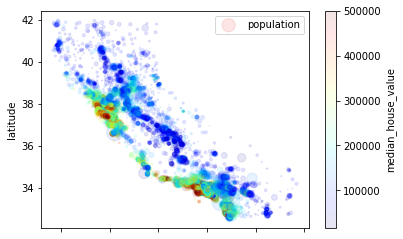

In [6]:
data.plot(kind="scatter" ,x="longitude" ,y="latitude", alpha=0.1,
          s=data["population"]/100, label="population",
         c="median_house_value", cmap=plt.get_cmap("jet"))

In [7]:
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [8]:
data_na = data.dropna(subset=["total_bedrooms"])
data_na.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [9]:
dummies = pd.get_dummies(data_na["ocean_proximity"])
data_na_dummies = pd.concat([data_na, dummies], axis="columns")
data_na_dummies.head()
data_clean = data_na_dummies.drop(["ocean_proximity", "ISLAND"], axis="columns") 
data_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


## Features and Labels dataset.

In [10]:
X=data_clean.drop(columns=["median_house_value"]) 
y=data_clean["median_house_value"]
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2 , random_state=1984)

In [12]:
from sklearn.linear_model import LinearRegression
OLS = LinearRegression()
OLS.fit(X_train, y_train)

LinearRegression()

### Display the intercepts and coefients of the OLS model

In [13]:
print(f"intercept is : {OLS.intercept_}")
print(f"Coeficients are: {OLS.coef_}")
print(f"The R-Squared is: {OLS.score(X_train, y_train)}") 

intercept is : -2146719.495872031
Coeficients are: [-2.72191872e+04 -2.61224400e+04  1.03631750e+03 -6.39771322e+00
  9.97707401e+01 -3.73545857e+01  4.99035484e+01  3.93656164e+04
 -1.49036788e+05 -1.87787533e+05 -1.51883617e+05 -1.45673607e+05]
The R-Squared is: 0.6433902949192565


## Predicting with OLS

In [14]:
y_pred = OLS.predict(X_test)
performance = pd.DataFrame({"Predictions":y_pred,"Actual Values": y_test})
performance["Error"] = performance["Actual Values"] - performance["Predictions"]
performance.head()

,Predictions,Actual Values,Error
15175,315646.738470,328200.0,12553.261530
15424,235926.156196,156900.0,-79026.156196
16212,157003.325611,87200.0,-69803.325611
15356,172404.340246,141000.0,-31404.340246
1899,82931.270634,100800.0,17868.729366


### Preparing data from Residuals Plotting

In [15]:
performance.reset_index(drop=True, inplace=True)
performance.reset_index(inplace=True)
performance.head()

,index,Predictions,Actual Values,Error
0,0,315646.738470,328200.0,12553.261530
1,1,235926.156196,156900.0,-79026.156196
2,2,157003.325611,87200.0,-69803.325611
3,3,172404.340246,141000.0,-31404.340246
4,4,82931.270634,100800.0,17868.729366


## Plot the Residuals

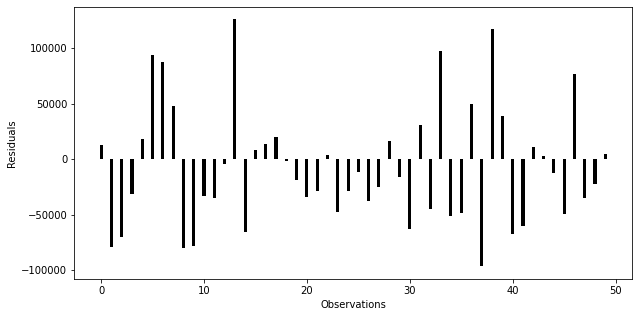

In [16]:
fig = plt.figure(figsize=(10, 5))
plt.bar("index", "Error", data=performance[:50], color="black", width=0.3)
plt.xlabel("Observations")
plt.ylabel("Residuals")
plt.show()

In [17]:
import statsmodels.api as sm
X_train= sm.add_constant(X_train)
better_OLS = sm.OLS(y_train, X_train).fit()
better_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     2456.
Date:                Mon, 21 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:52:31   Log-Likelihood:            -2.0522e+05
No. Observations:               16346   AIC:                         4.105e+05
Df Residuals:                   16333   BIC:                         4.106e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.147e+06   1.05e+05    -20.413      0.000   -2.35e+06   -1.94e+06
longitude          -2.722e+04   1141.708    -23.841      0.000   -2.95e+04    -2.5e+04
latitude           -2.612e+04   1125.571    -23.208      0.000   -2.83e+04   -2.39e+04
housing_median_age  1036.3175     49.179     21.072      0.000     939.922    1132.713
total_rooms           -6.3977      0.891     -7.184      0.000      -8.143      -4.652
total_bedrooms        99.7707      7.613     13.105      0.000      84.848     114.694
population           -37.3546      1.189    -31.405      0.000     -39.686     -35.023
households            49.9035      8.223      6.069      0.000      33.786      66.021
median_income       3.937e+04    382.254    102.983      0.000    3.86e+04    4.01e+04
<1H OCEAN           -1.49e+05   3.43e+04     -4.339      0.000   -2.16e+05   -8.17e+04
INLAND             -1.878e+05   3.44e+04     -5.456      0.000   -2.55e+05    -1.2e+05
NEAR BAY           -1.519e+05   3.44e+04     -4.416      0.000   -2.19e+05   -8.45e+04
NEAR OCEAN         -1.457e+05   3.44e+04     -4.239      0.000   -2.13e+05   -7.83e+04
==============================================================================
Omnibus:                     4103.497   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16258.145
Skew:                           1.201   Prob(JB):                         0.00
Kurtosis:                       7.255   Cond. No.                     8.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""